In [2]:
import matplotlib
matplotlib.use('Qt5Agg')

In [3]:
import mne
import matplotlib
import matplotlib.pyplot as plt

In [4]:
path = r"C:\Users\batra\INMAS\Project 2\VP001\nback1.vhdr"
marker = r"C:\Users\batra\INMAS\Project 2\VP001\nback1.vmrk"

In [5]:
matplotlib.use('Qt5Agg')
# %matplotlib widget
%matplotlib qt
# %gui qt
# mne.viz.set_3d_backend("notebook")

In [6]:
fname= "channel_loc.csv"
TUB_montage = mne.channels.read_custom_montage(fname)

In [7]:
raw = mne.io.read_raw_brainvision(path, eog=('HEOG', 'VEOG'), preload=True)

Extracting parameters from C:\Users\batra\INMAS\Project 2\VP001\nback1.vhdr...
Setting channel info structure...


<ipython-input-7-147357d1d9df>:1: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1000.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(path, eog=('HEOG', 'VEOG'), preload=True)


Reading 0 ... 701439  =      0.000 ...   701.439 secs...


In [8]:
raw.set_montage(TUB_montage)

<ipython-input-8-5897c02f5ea4>:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(TUB_montage)


<RawBrainVision | nback1.eeg, 30 x 701440 (701.4 s), ~160.6 MB, data loaded>

In [9]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, AFF5, AFz, F1, FC5, FC1, T7, C3, Cz, CP5, CP1, P7, P3, Pz, ...
 chs: 28 EEG, 2 EOG
 custom_ref_applied: False
 dig: 28 items (28 EEG)
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2016-05-26 12:38:27 UTC
 nchan: 30
 projs: []
 sfreq: 1000.0 Hz
>

Using matplotlib as 2D backend.


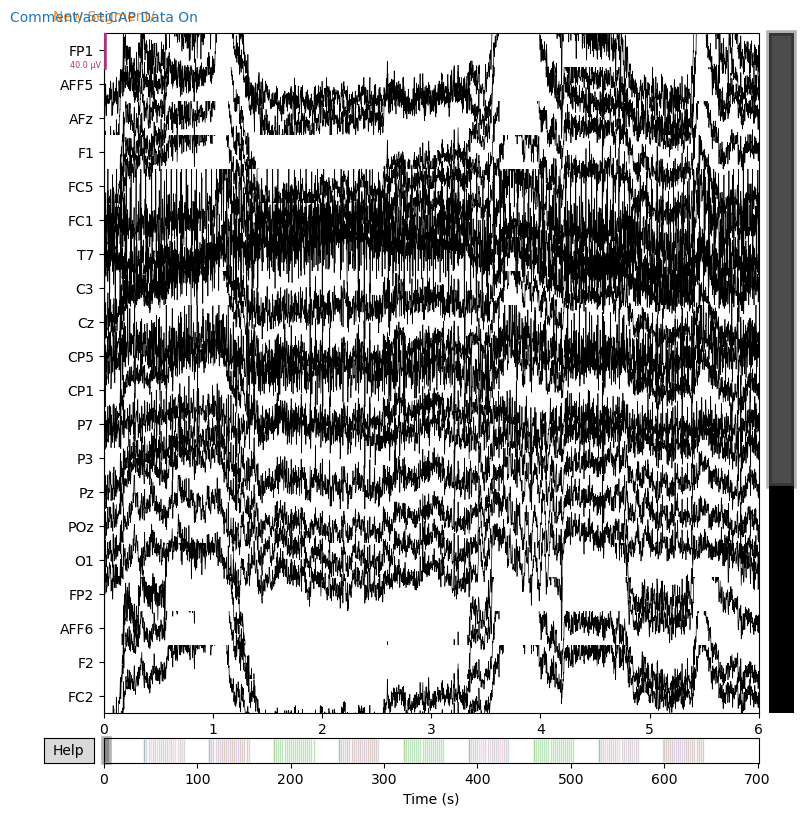

In [10]:
raw.plot(start=0, duration=6)

In [11]:
mrk = mne.read_annotations(marker, sfreq='auto', uint16_codec=None)

Finding 'sfreq' from header file: C:\Users\batra\INMAS\Project 2\VP001\nback1.vhdr


In [12]:
raw_filtered = raw.copy().filter(l_freq=0.1 , h_freq= 45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 33001 samples (33.001 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.4s finished


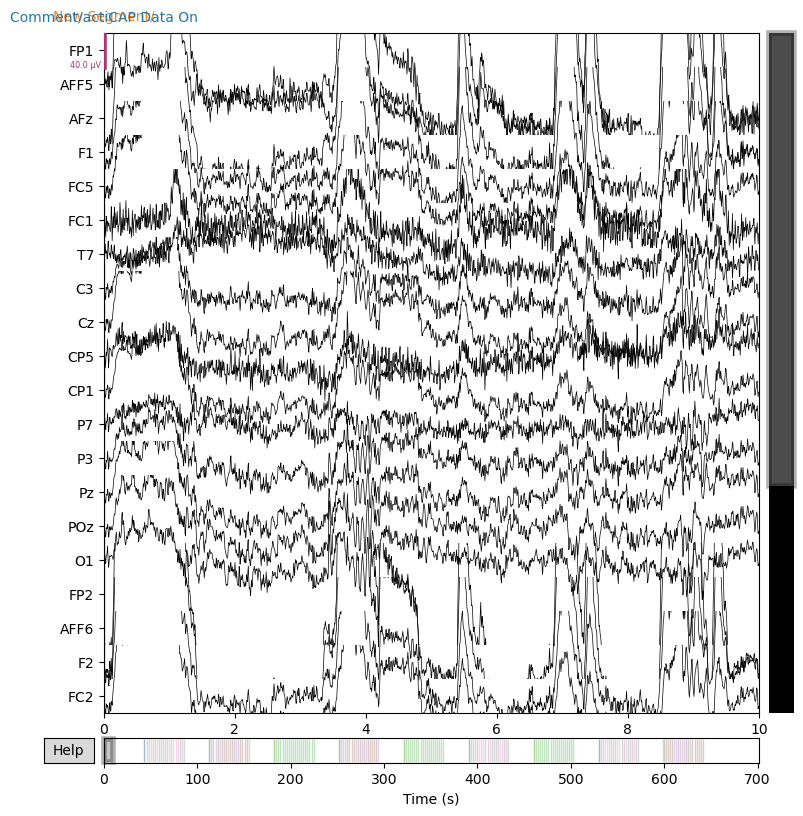

In [13]:
raw_filtered.plot()

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.8s finished


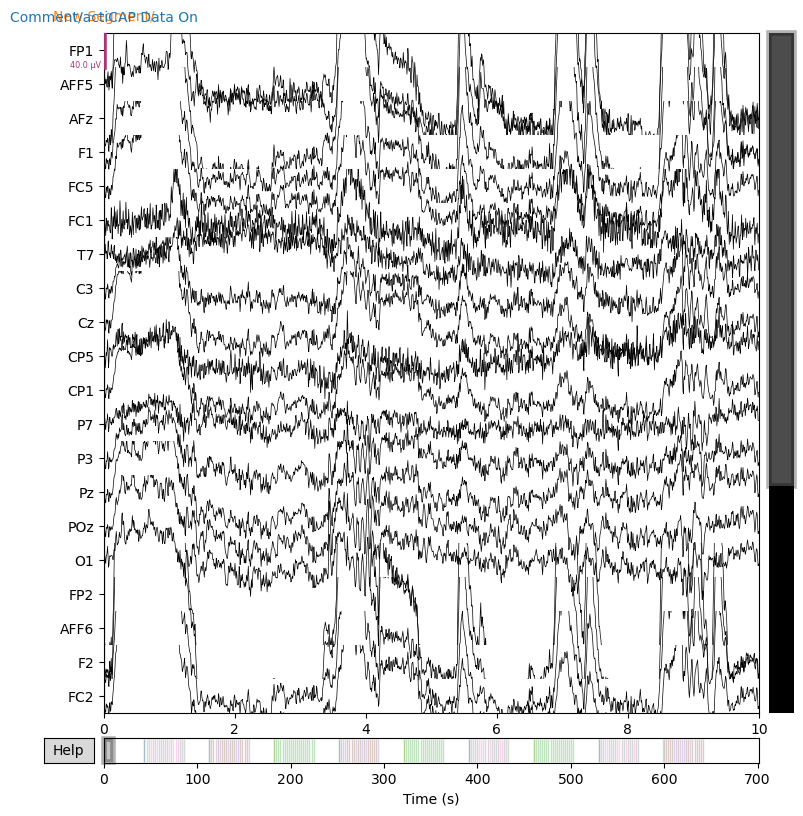

In [14]:
raw_notch_filtered = raw_filtered.notch_filter(50, filter_length='auto', phase='zero')
raw_notch_filtered.plot()          

In [15]:
raw_re_referenced = mne.set_eeg_reference(raw_notch_filtered,ref_channels='average',copy=True, projection=False)
finData, times = raw_re_referenced[:]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


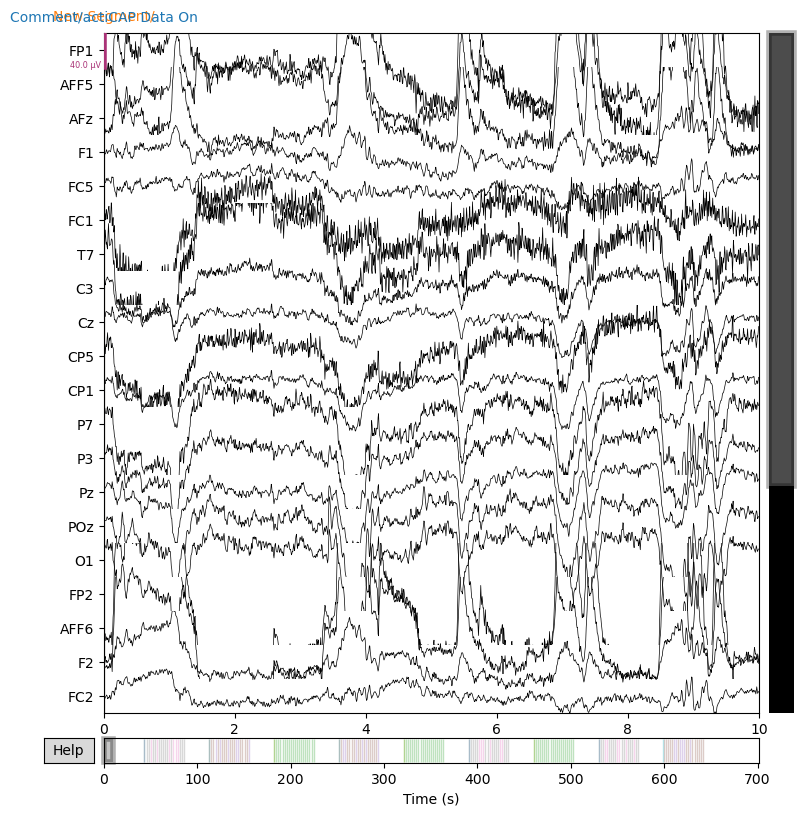

In [16]:
finData.plot()

In [17]:
fig, ax = plt.subplots(2)
raw.plot_psd(ax=ax[0], show = False, fmax = 60)
finData.plot_psd(ax=ax[1], show = False, fmax=60)
ax[0].set_title("PSD before filtering")
ax[1].set_title("PSD after filtering")
ax[1].set_xlabel('Frequency(Hz)')
fig.set_tight_layout(True)
plt.show()

Effective window size : 2.048 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


Effective window size : 2.048 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


In [18]:
n_components = 10 #number of components you want to fit # can be either integer which typically implies number of channels - 1 (if applied average reference)
                  #if floating point number (0-1) fraction of total explained variance
method = 'fastica'
max_iter = 100
fit_params = dict(fastica_it = 5)
random_state = 42
ica = mne.preprocessing.ICA(n_components = n_components,
                        method = method,
                        max_iter=max_iter,
                        random_state= random_state
                        )
ica.fit(finData)

Fitting ICA to data using 28 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 9.3s.


Method,fastica
Fit,24 iterations on raw data (701440 samples)
ICA components,10
Explained variance,98.5 %
Available PCA components,28
Channel types,eeg
ICA components marked for exclusion,—


In [19]:
finData.load_data()
ica.plot_sources(finData, show_scrollbars=False)
ica.plot_components(sphere=1)

Creating RawArray with float64 data, n_channels=12, n_times=701440
    Range : 0 ... 701439 =      0.000 ...   701.439 secs
Ready.


[<MNEFigure size 975x496 with 10 Axes>]

Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 2 ICA components
    Projecting back using 28 PCA components


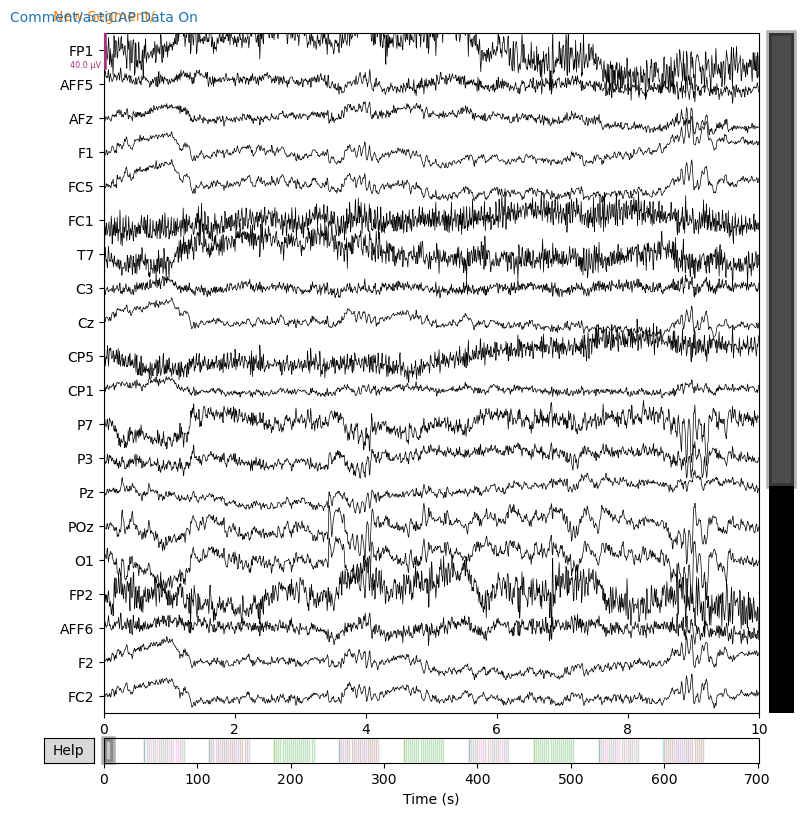

In [20]:
#Manual Eye Artifact Removal
ica.exclude = [0, 3]  
reconst_raw = finData.copy()
ica.apply(reconst_raw)

finData.plot(title = "finData")
reconst_raw.plot(title = "Manual")

Using EOG channels: HEOG, VEOG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 2 ICA components
    Projecting back using 28 PCA components


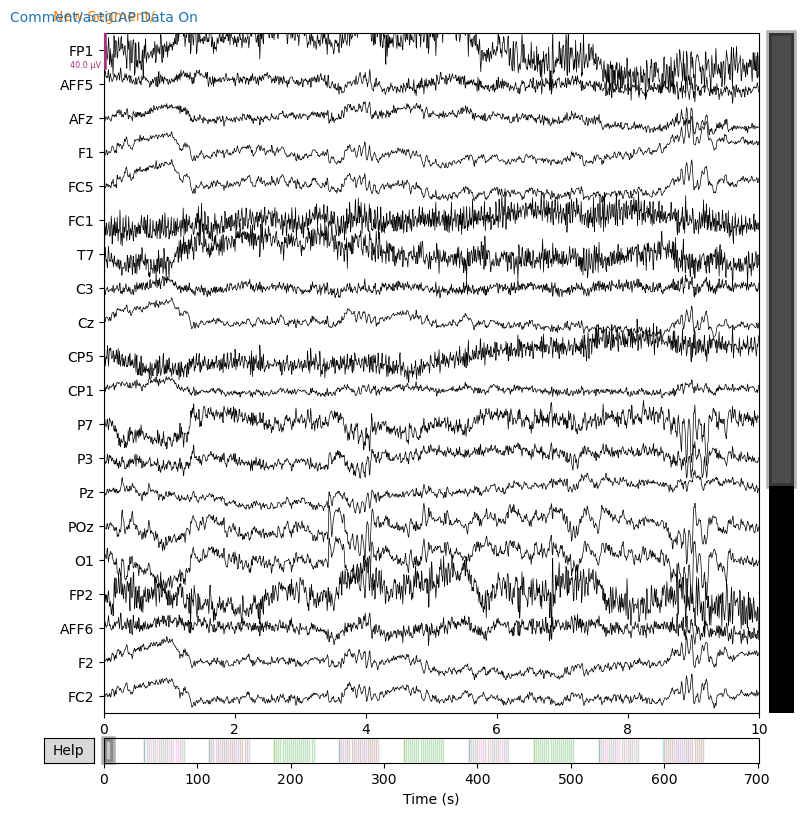

In [21]:
#Automatic (Threshold Based) Eye Artifact Removal
ica.exclude = []
reconst_raw = finData.copy()
# find which ICs match the EOG pattern
eog_indices, eog_scores = ica.find_bads_eog(finData, threshold = 2.5)
ica.exclude = eog_indices
ica.apply(reconst_raw)

#print(eog_indices)

reconst_raw.plot(title="Automatic")


# # barplot of ICA component "EOG match" scores
# ica.plot_scores(eog_scores)

# # plot diagnostics
# ica.plot_properties(finData, picks=eog_indices)

# # plot ICs applied to raw data, with EOG matches highlighted
# ica.plot_sources(finData, show_scrollbars=False)

# # plot ICs applied to the averaged EOG epochs, with EOG matches highlighted
# ica.plot_sources(eog_evoked)


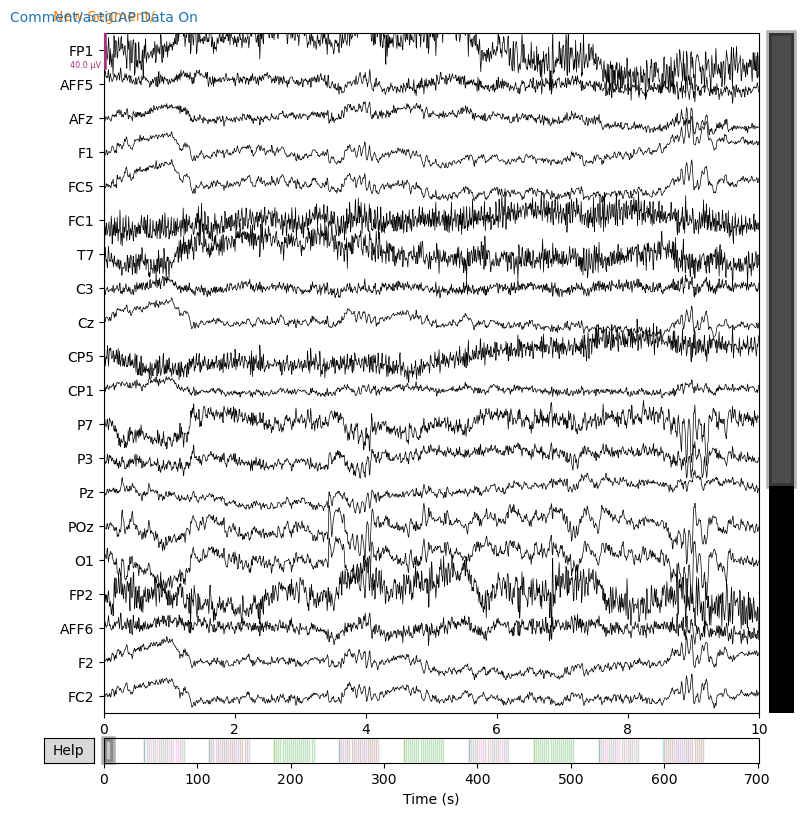

In [22]:
reconst_raw.plot()

In [23]:
events_ids = {
 'Stimulus/S 16': 0,
 'Stimulus/S 48': 2,
 'Stimulus/S 64': 2,
 'Stimulus/S 80': 3,
 'Stimulus/S 96': 3}
events_ids

{'Stimulus/S 16': 0,
 'Stimulus/S 48': 2,
 'Stimulus/S 64': 2,
 'Stimulus/S 80': 3,
 'Stimulus/S 96': 3}

In [24]:
event,event_ids = mne.events_from_annotations(reconst_raw, events_ids)

Used Annotations descriptions: ['Stimulus/S 16', 'Stimulus/S 48', 'Stimulus/S 64', 'Stimulus/S 80', 'Stimulus/S 96']


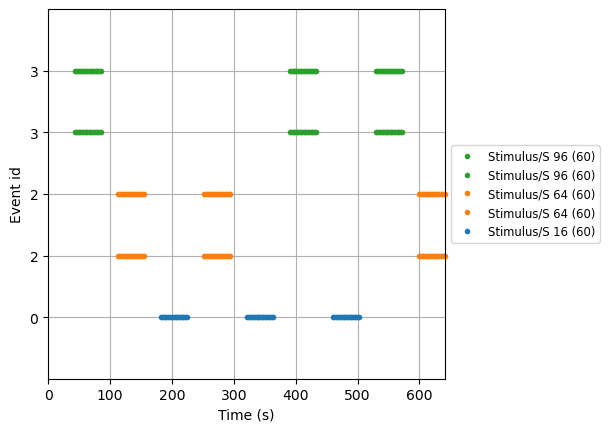

In [25]:
mne.viz.plot_events(event,event_id = events_ids, sfreq=raw.info['sfreq'])

In [26]:
tmin=-0.3 # when does the epoch start relative to the event onset # 300ms before the start of the event
tmax=1.7  # when does the event end after the even onset # 500 ms from the start of the event

#Is a tuple containing the start of the baseline and end of the baseline
baseline= (None, 0) #None mean begnining of the event and 0 is the start of the event 

epochs = mne.Epochs(reconst_raw, 
                    events=event,
                    event_id=event_ids,
                    tmin=tmin,tmax=tmax, 
                    baseline=baseline,
                    preload=True,event_repeated = 'drop')

Not setting metadata
180 matching events found
Setting baseline interval to [-0.3, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 180 events and 2001 original time points ...
0 bad epochs dropped


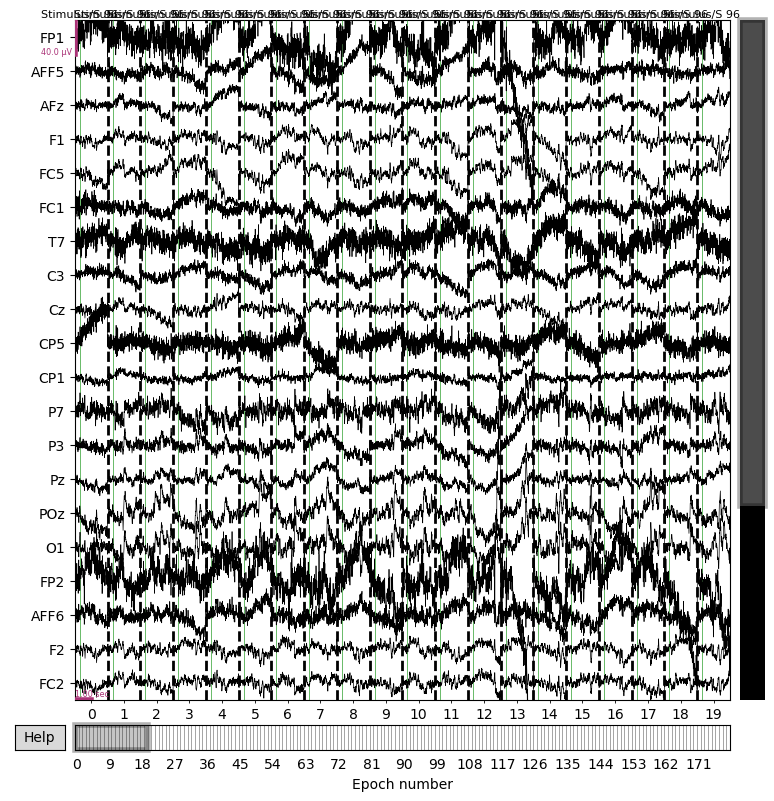

In [27]:
epochs.plot(events=event, event_id = event_ids)

In [28]:
import numpy as np
e3=event[:,-1]
e4 = np.repeat(e3,2001, axis=0)
e5 = np.reshape(e4,(180,2001))
print(e3.shape)

(180,)


In [29]:
j=0
dat = []
for i in epochs:
    dat.append(np.array(i))
    j+=1
dat = np.array(dat)

In [30]:
dat.shape

(180, 30, 2001)

# Fractal Dimension!

In [31]:
def fractal_dimension(Z, threshold=0.9):

    # Only for 2d image
    assert(len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]


# coeff of var

In [32]:
def coeff_var(a):
    b = a #Extracting the data from the 14 channels
    output = np.zeros(len(b)) #Initializing the output array with zeros
    k = 0; #For counting the current row no.
    for i in b:
        mean_i = np.mean(i) #Saving the mean of array i
        std_i = np.std(i) #Saving the standard deviation of array i
        output[k] = std_i/mean_i #computing coefficient of variation
        k=k+1
    return np.sum(output)/30

# Mean of Vertex to Vertex Slope

In [33]:
import heapq
from scipy.signal import argrelextrema


def first_diff(i):
    b=i    
    
    out = np.zeros(len(b))
    
    for j in range(len(i)):
        out[j] = b[j-1]-b[j]# Obtaining the 1st Diffs
        
        j=j+1
        c=out[1:len(out)]
    return c #returns first diff


def slope_mean(p):
    b = p #Extracting the data from the 14 channels
    output = np.zeros(len(b)) #Initializing the output array with zeros
    res = np.zeros(len(b)-1)
    
    k = 0; #For counting the current row no.
    for i in b:
        x=i
        amp_max = i[argrelextrema(x, np.greater)[0]]
        t_max = argrelextrema(x, np.greater)[0]
        amp_min = i[argrelextrema(x, np.less)[0]]
        t_min = argrelextrema(x, np.less)[0]
        t = np.concatenate((t_max,t_min),axis=0)
        t.sort()#sort on the basis of time

        h=0
        amp = np.zeros(len(t))
        res = np.zeros(len(t)-1)
        for l in range(len(t)):
            amp[l]=i[t[l]]
           
        
        amp_diff = first_diff(amp)
        
        t_diff = first_diff(t)
        
        for q in range(len(amp_diff)):
            res[q] = amp_diff[q]/t_diff[q]         
        output[k] = np.mean(res) 
        k=k+1
    return np.sum(output)/30


# Variance of Vertex to Vertex Slope

In [34]:
import heapq
from scipy.signal import argrelextrema


def first_diff(i):
    b=i    
    
    out = np.zeros(len(b))
    
    for j in range(len(i)):
        out[j] = b[j-1]-b[j]# Obtaining the 1st Diffs
        
        j=j+1
        c=out[1:len(out)]
    return c #returns first diff


def slope_var(p):
    b = p #Extracting the data from the 14 channels
    output = np.zeros(len(b)) #Initializing the output array with zeros
    res = np.zeros(len(b)-1)
    
    k = 0; #For counting the current row no.
    for i in b:
        x=i
        amp_max = i[argrelextrema(x, np.greater)[0]]#storing maxima value
        t_max = argrelextrema(x, np.greater)[0]#storing time for maxima
        amp_min = i[argrelextrema(x, np.less)[0]]#storing minima value
        t_min = argrelextrema(x, np.less)[0]#storing time for minima value
        t = np.concatenate((t_max,t_min),axis=0) #making a single matrix of all matrix
        t.sort() #sorting according to time

        h=0
        amp = np.zeros(len(t))
        res = np.zeros(len(t)-1)
        for l in range(len(t)):
            amp[l]=i[t[l]]
           
        
        amp_diff = first_diff(amp)
        
        t_diff = first_diff(t)
        
        for q in range(len(amp_diff)):
            res[q] = amp_diff[q]/t_diff[q] #calculating slope        
    
        output[k] = np.var(res) 
        k=k+1#counting k
    return np.sum(output)/30


# Hjorth

In [35]:
def hjorth(input):                                             # function for hjorth 
    realinput = input
    hjorth_activity = np.zeros(len(realinput))
    hjorth_mobility = np.zeros(len(realinput))
    hjorth_diffmobility = np.zeros(len(realinput))
    hjorth_complexity = np.zeros(len(realinput))
    diff_input = np.diff(realinput)
    diff_diffinput = np.diff(diff_input)
    k = 0
    for j in realinput:
        hjorth_activity[k] = np.var(j)
        hjorth_mobility[k] = np.sqrt(np.var(diff_input[k])/hjorth_activity[k])
        hjorth_diffmobility[k] = np.sqrt(np.var(diff_diffinput[k])/np.var(diff_input[k]))
        hjorth_complexity[k] = hjorth_diffmobility[k]/hjorth_mobility[k]
        k = k+1
    return np.sum(hjorth_activity)/30, np.sum(hjorth_mobility)/30, np.sum(hjorth_complexity)/30

# Kurtosis

In [36]:
def kurtosis(a):
    b = a # Extracting the data from the 14 channels
    output = np.zeros(len(b)) # Initializing the output array with zeros (length = 14)
    k = 0; # For counting the current row no.
    for i in b:
        mean_i = np.mean(i) # Saving the mean of array i
        std_i = np.std(i) # Saving the standard deviation of array i
        t = 0.0
        for j in i:
            t += (pow((j-mean_i)/std_i,4)-3)
        kurtosis_i = t/len(i) # Formula: (1/N)*(summation(x_i-mean)/standard_deviation)^4-3
        output[k] = kurtosis_i # Saving the kurtosis in the array created
        k +=1 # Updating the current row no.
    return np.sum(output)/30

# Second Difference Mean


In [37]:
def secDiffMean(a):
    b = a # Extracting the data of the 14 channels
    output = np.zeros(len(b)) # Initializing the output array with zeros (length = 14)
    temp1 = np.zeros(len(b[0])-1) # To store the 1st Diffs
    k = 0; # For counting the current row no.
    for i in b:
        t = 0.0
        for j in range(len(i)-1):
            temp1[j] = abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
        for j in range(len(i)-2):
            t += abs(temp1[j+1]-temp1[j]) # Summing the 2nd Diffs
        output[k] = t/(len(i)-2) # Calculating the mean of the 2nd Diffs
        k +=1 # Updating the current row no.
    return np.sum(output)/30

# Second Difference Max

In [38]:
def secDiffMax(a):
    b = a # Extracting the data from the 14 channels
    output = np.zeros(len(b)) # Initializing the output array with zeros (length = 14)
    temp1 = np.zeros(len(b[0])-1) # To store the 1st Diffs
    k = 0; # For counting the current row no.
    t = 0.0
    for i in b:
        for j in range(len(i)-1):
            temp1[j] = abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
        t = temp1[1] - temp1[0]
        for j in range(len(i)-2):
            if abs(temp1[j+1]-temp1[j]) > t :
                t = temp1[j+1]-temp1[j] # Comparing current Diff with the last updated Diff Max

        output[k] = t # Storing the 2nd Diff Max for channel k
        k +=1 # Updating the current row no.
    return np.sum(output)/30

# Skewness

In [39]:
import scipy.stats as sp
def skewness(arr):
    data = arr 
    skew_array = np.zeros(len(data)) #Initialinling the array as all 0s
    index = 0; #current cell position in the output array
   
    for i in data:
        skew_array[index]=sp.stats.skew(i,axis=0,bias=True)
        index+=1 #updating the cell position
    return np.sum(skew_array)/30

# First Difference Mean

In [40]:
def first_diff_mean(arr):
    data = arr 
    diff_mean_array = np.zeros(len(data)) #Initialinling the array as all 0s
    index = 0; #current cell position in the output array
   
    for i in data:
        sum=0.0#initializing the sum at the start of each iteration
        for j in range(len(i)-1):
            sum += abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
           
        diff_mean_array[index]=sum/(len(i)-1)
        index+=1 #updating the cell position
    return np.sum(diff_mean_array)/30

# First Difference Max

In [41]:
def first_diff_max(arr):
    data = arr 
    diff_max_array = np.zeros(len(data)) #Initialinling the array as all 0s
    first_diff = np.zeros(len(data[0])-1)#Initialinling the array as all 0s 
    index = 0; #current cell position in the output array
   
    for i in data:
        max=0.0#initializing at the start of each iteration
        for j in range(len(i)-1):
            first_diff[j] = abs(i[j+1]-i[j]) # Obtaining the 1st Diffs
            if first_diff[j]>max: 
                max=first_diff[j] # finding the maximum of the first differences
        diff_max_array[index]=max
        index+=1 #updating the cell position
    return np.sum(diff_max_array)/30

# Wavelet Fetures!
# Approx Mean, Approx Std Deviation, Approx Energy, Detailed Mean, Detailed Std Deviation, Detailed Energy, Approx Entropy & Detailed Entropy

In [42]:
import pywt

def wavelet_features(epoch,channels):
    cA_values = []
    cD_values = []
    cA_mean = []
    cA_std = []
    cA_Energy =[]
    cD_mean = []
    cD_std = []
    cD_Energy = []
    Entropy_D = []
    Entropy_A = []
    wfeatures = []
    for i in range(channels):
        cA,cD=pywt.dwt(epoch[i,:],'coif1')
        cA_values.append(cA)
        cD_values.append(cD)		#calculating the coefficients of wavelet transform.
    for x in range(channels):   
        cA_mean.append(np.mean(cA_values[x]))
        wfeatures.append(np.mean(cA_values[x]))
        
        cA_std.append(abs(np.std(cA_values[x])))
        wfeatures.append(abs(np.std(cA_values[x])))
        
        cA_Energy.append(abs(np.sum(np.square(cA_values[x]))))
        wfeatures.append(abs(np.sum(np.square(cA_values[x]))))
        
        cD_mean.append(np.mean(cD_values[x]))		# mean and standard deviation values of coefficents of each channel is stored .
        wfeatures.append(np.mean(cD_values[x]))

        cD_std.append(abs(np.std(cD_values[x])))
        wfeatures.append(abs(np.std(cD_values[x])))
        
        cD_Energy.append(abs(np.sum(np.square(cD_values[x]))))
        wfeatures.append(abs(np.sum(np.square(cD_values[x]))))
        
        Entropy_D.append(abs(np.sum(np.square(cD_values[x]) * np.log(np.square(cD_values[x])))))
        wfeatures.append(abs(np.sum(np.square(cD_values[x]) * np.log(np.square(cD_values[x])))))
        
        Entropy_A.append(abs(np.sum(np.square(cA_values[x]) * np.log(np.square(cA_values[x]))))) 
        wfeatures.append(abs(np.sum(np.square(cA_values[x]) * np.log(np.square(cA_values[x])))))
    return wfeatures


In [43]:
x=[]
for i in dat:
    features=[]
    # Fractal Dimension
    features.append(fractal_dimension(i))

    #Coeffeicient of Variation
    features.append(coeff_var(i))

    #Mean of Vertex to Vertex Slope
    features.append(slope_mean(i))

    #Variance of Vertex to Vertex Slope
    features.append(slope_var(i))

    #Hjorth Parameters
    feature_list = hjorth(i)
    for feat in feature_list:
        features.append(feat)

    #Kurtosis
    features.append(kurtosis(i))

    #Second Difference Mean
    features.append(secDiffMean(i))

    #Second Difference Max
    features.append(secDiffMax(i))

    #Skewness
    features.append(skewness(i))

    #First Difference Mean
    features.append(first_diff_mean(i))

    #First Difference Max
    features.append(first_diff_max(i))
    #wavlent features
    feature_list = wavelet_features(i,30)
    for feat in feature_list:
        features.append(feat)
    x.append(features)
                    

In [44]:
x=np.array(x)

In [45]:
import pandas as pd
df=pd.DataFrame(x)
df

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,1.0,0.163540,-2.850576e-09,2.367670e-12,5.275163e-10,0.115319,3.046968,0.136134,3.601922e-07,0.000002,...,4.245606e-07,0.000010,0.000076,0.000168,0.000034,1.825311e-08,0.000003,8.288743e-09,2.032346e-07,0.000513
1,1.0,-121.452179,-3.386391e-09,2.120824e-12,8.769523e-10,0.114099,3.283802,0.215257,3.380555e-07,0.000002,...,3.323427e-07,0.000006,0.000069,0.000224,0.000055,2.471721e-08,0.000003,9.330867e-09,2.286005e-07,0.000799
2,1.0,4.328777,5.862798e-09,2.402285e-12,1.161580e-09,0.105237,3.509769,-0.358460,3.552838e-07,0.000002,...,2.900092e-07,0.000022,0.000186,0.000257,0.000101,4.299461e-08,0.000003,1.112530e-08,2.702256e-07,0.001494
3,1.0,-0.160966,-2.100919e-09,2.029259e-12,1.017452e-09,0.107178,3.304843,-0.014843,3.339482e-07,0.000002,...,2.414133e-07,0.000011,0.000120,0.000241,0.000073,-3.440140e-09,0.000003,1.025896e-08,2.481077e-07,0.001069
4,1.0,-0.261477,3.095246e-09,1.980825e-12,5.933820e-10,0.105081,3.487351,0.051619,3.320092e-07,0.000002,...,2.584423e-07,0.000009,0.000068,0.000180,0.000037,-5.782926e-08,0.000003,9.427681e-09,2.319611e-07,0.000545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.0,-0.267732,1.253418e-08,5.238808e-12,2.088779e-09,0.101483,3.723644,-0.145871,5.019402e-07,0.000003,...,8.737646e-07,0.000011,0.000207,0.000347,0.000164,-3.585899e-08,0.000005,2.595721e-08,6.112984e-07,0.002342
176,1.0,-2.894595,1.476094e-08,7.318486e-12,1.113361e-08,0.046581,10.606657,2.065178,5.713288e-07,0.000003,...,1.063955e-06,0.000013,0.000326,0.000700,0.000597,-5.628050e-08,0.000007,4.910203e-08,1.118274e-06,0.007412
177,1.0,0.862090,-1.953421e-09,1.259862e-11,7.913207e-09,0.056215,7.265884,-0.599591,7.370262e-07,0.000004,...,1.608958e-06,0.000090,-0.000491,0.000626,0.000635,6.380614e-08,0.000009,8.108805e-08,1.813695e-06,0.008476
178,1.0,0.407578,5.647016e-09,5.963073e-12,3.274099e-09,0.075050,6.492188,-0.481628,5.370757e-07,0.000003,...,1.004222e-06,0.000014,-0.000508,0.000363,0.000392,-4.755125e-08,0.000005,2.637546e-08,6.197710e-07,0.005595


In [46]:
x.shape

(180, 253)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

In [48]:
import pandas as pd

In [49]:
df=pd.DataFrame(x)

In [50]:
df

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,1.0,0.163540,-2.850576e-09,2.367670e-12,5.275163e-10,0.115319,3.046968,0.136134,3.601922e-07,0.000002,...,4.245606e-07,0.000010,0.000076,0.000168,0.000034,1.825311e-08,0.000003,8.288743e-09,2.032346e-07,0.000513
1,1.0,-121.452179,-3.386391e-09,2.120824e-12,8.769523e-10,0.114099,3.283802,0.215257,3.380555e-07,0.000002,...,3.323427e-07,0.000006,0.000069,0.000224,0.000055,2.471721e-08,0.000003,9.330867e-09,2.286005e-07,0.000799
2,1.0,4.328777,5.862798e-09,2.402285e-12,1.161580e-09,0.105237,3.509769,-0.358460,3.552838e-07,0.000002,...,2.900092e-07,0.000022,0.000186,0.000257,0.000101,4.299461e-08,0.000003,1.112530e-08,2.702256e-07,0.001494
3,1.0,-0.160966,-2.100919e-09,2.029259e-12,1.017452e-09,0.107178,3.304843,-0.014843,3.339482e-07,0.000002,...,2.414133e-07,0.000011,0.000120,0.000241,0.000073,-3.440140e-09,0.000003,1.025896e-08,2.481077e-07,0.001069
4,1.0,-0.261477,3.095246e-09,1.980825e-12,5.933820e-10,0.105081,3.487351,0.051619,3.320092e-07,0.000002,...,2.584423e-07,0.000009,0.000068,0.000180,0.000037,-5.782926e-08,0.000003,9.427681e-09,2.319611e-07,0.000545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.0,-0.267732,1.253418e-08,5.238808e-12,2.088779e-09,0.101483,3.723644,-0.145871,5.019402e-07,0.000003,...,8.737646e-07,0.000011,0.000207,0.000347,0.000164,-3.585899e-08,0.000005,2.595721e-08,6.112984e-07,0.002342
176,1.0,-2.894595,1.476094e-08,7.318486e-12,1.113361e-08,0.046581,10.606657,2.065178,5.713288e-07,0.000003,...,1.063955e-06,0.000013,0.000326,0.000700,0.000597,-5.628050e-08,0.000007,4.910203e-08,1.118274e-06,0.007412
177,1.0,0.862090,-1.953421e-09,1.259862e-11,7.913207e-09,0.056215,7.265884,-0.599591,7.370262e-07,0.000004,...,1.608958e-06,0.000090,-0.000491,0.000626,0.000635,6.380614e-08,0.000009,8.108805e-08,1.813695e-06,0.008476
178,1.0,0.407578,5.647016e-09,5.963073e-12,3.274099e-09,0.075050,6.492188,-0.481628,5.370757e-07,0.000003,...,1.004222e-06,0.000014,-0.000508,0.000363,0.000392,-4.755125e-08,0.000005,2.637546e-08,6.197710e-07,0.005595


In [51]:
df[253]=e3

In [52]:
df

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,1.0,0.163540,-2.850576e-09,2.367670e-12,5.275163e-10,0.115319,3.046968,0.136134,3.601922e-07,0.000002,...,0.000010,0.000076,0.000168,0.000034,1.825311e-08,0.000003,8.288743e-09,2.032346e-07,0.000513,3
1,1.0,-121.452179,-3.386391e-09,2.120824e-12,8.769523e-10,0.114099,3.283802,0.215257,3.380555e-07,0.000002,...,0.000006,0.000069,0.000224,0.000055,2.471721e-08,0.000003,9.330867e-09,2.286005e-07,0.000799,3
2,1.0,4.328777,5.862798e-09,2.402285e-12,1.161580e-09,0.105237,3.509769,-0.358460,3.552838e-07,0.000002,...,0.000022,0.000186,0.000257,0.000101,4.299461e-08,0.000003,1.112530e-08,2.702256e-07,0.001494,3
3,1.0,-0.160966,-2.100919e-09,2.029259e-12,1.017452e-09,0.107178,3.304843,-0.014843,3.339482e-07,0.000002,...,0.000011,0.000120,0.000241,0.000073,-3.440140e-09,0.000003,1.025896e-08,2.481077e-07,0.001069,3
4,1.0,-0.261477,3.095246e-09,1.980825e-12,5.933820e-10,0.105081,3.487351,0.051619,3.320092e-07,0.000002,...,0.000009,0.000068,0.000180,0.000037,-5.782926e-08,0.000003,9.427681e-09,2.319611e-07,0.000545,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.0,-0.267732,1.253418e-08,5.238808e-12,2.088779e-09,0.101483,3.723644,-0.145871,5.019402e-07,0.000003,...,0.000011,0.000207,0.000347,0.000164,-3.585899e-08,0.000005,2.595721e-08,6.112984e-07,0.002342,2
176,1.0,-2.894595,1.476094e-08,7.318486e-12,1.113361e-08,0.046581,10.606657,2.065178,5.713288e-07,0.000003,...,0.000013,0.000326,0.000700,0.000597,-5.628050e-08,0.000007,4.910203e-08,1.118274e-06,0.007412,2
177,1.0,0.862090,-1.953421e-09,1.259862e-11,7.913207e-09,0.056215,7.265884,-0.599591,7.370262e-07,0.000004,...,0.000090,-0.000491,0.000626,0.000635,6.380614e-08,0.000009,8.108805e-08,1.813695e-06,0.008476,2
178,1.0,0.407578,5.647016e-09,5.963073e-12,3.274099e-09,0.075050,6.492188,-0.481628,5.370757e-07,0.000003,...,0.000014,-0.000508,0.000363,0.000392,-4.755125e-08,0.000005,2.637546e-08,6.197710e-07,0.005595,2


In [54]:
from sklearn.model_selection import train_test_split
x=df[:253]
y=df[253]
print(x.shape,y.shape)
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.75,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(180, 254) (180,)
(135, 254) (135,)
(45, 254) (45,)


In [55]:
from sklearn.ensemble import RandomForestClassifier

#2-RandomForest
print('#2-RandomForest')
model = RandomForestClassifier(n_estimators=100, n_jobs=4)
model.fit(x_train, y_train)
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None)



#2-RandomForest


0.8666666666666667

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test_pred,y_test)

array([[11,  1,  2],
       [ 2, 13,  1],
       [ 0,  0, 15]], dtype=int64)

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none


Traceback (most recent call last):
  File "D:\Users\batra\anaconda3\lib\site-packages\mne\utils\config.py", line 156, in _load_config
    config = json.load(fid)
  File "D:\Users\batra\anaconda3\lib\json\__init__.py", line 293, in load
    return loads(fp.read(),
  File "D:\Users\batra\anaconda3\lib\json\__init__.py", line 357, in loads
    return _default_decoder.decode(s)
  File "D:\Users\batra\anaconda3\lib\json\decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "D:\Users\batra\anaconda3\lib\json\decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Users\batra\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 224, in process
    func(*args, **kwargs)
  File "D:\Users\batra\anaconda3\lib\sit

In [58]:
df.to_csv(r'C:\Users\batra\INMAS\Sub_2.1.csv',index=False)